<a href="https://colab.research.google.com/github/nairmeghna/projects/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction: Tesla**

Meghna M Nair

**Introduction**

In today's dynamic financial landscape, making informed decisions in the stock market is crucial for investors and traders. The ability to predict stock price movements accurately can significantly impact investment strategies and ultimately, financial outcomes. This project aims to leverage the power of machine learning to provide predictive insights into the stock price movements of Tesla, one of the most prominent and closely watched companies in the world.

The project employs a comprehensive approach to stock price prediction, encompassing data preprocessing, feature engineering, and the application of multiple machine learning models. The dataset used is sourced from historical stock market data for Tesla, encompassing various attributes such as opening and closing prices, high and low prices, and key date-related indicators. With the aid of Python's powerful libraries, including pandas, scikit-learn, and XGBoost, we conduct a thorough analysis to forecast whether Tesla's stock price will rise or fall on a given trading day.



**About Dataset**

The core foundation of this project lies in a comprehensive dataset containing historical stock market data for Tesla Inc.



*   **Date**: This column records the date of each trading session, allowing us to establish a chronological sequence of Tesla's stock price movements. This temporal dimension is pivotal for time-series analysis and trend identification.
*   Open Price: The "Open" column represents the opening price of Tesla's stock at the beginning of a trading session. This price point sets the initial tone for the day's trading activity and serves as a crucial reference point for investors and traders.


*   **High**: The "High" column captures the highest price reached by Tesla's stock during a trading session. This metric signifies the peak value that the stock achieved within the day and often reflects investor sentiment and market dynamics.
*   **Low**: In contrast, the "Low" column records the lowest price observed during a trading session. This metric provides insight into the intraday fluctuations and potential support levels for the stock.


*   **Closing**: The "Close" column documents the closing price of Tesla's stock at the end of each trading session. It signifies the final trading price for the day and is a critical parameter for assessing daily price changes.
*   **Adj Close**: The "Adj Close" column represents the closing price adjusted for factors such as dividends, stock splits, and other corporate actions. This adjusted figure provides a more accurate reflection of the stock's value over time.


*   **Volume**: The "Volume" column records the total number of shares of Tesla stock traded during a specific trading session. This metric offers insights into the liquidity and trading activity of the stock, shedding light on market participation.

In [1]:
# importing necesary dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv("/content/Tesla.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,3.800,5.000,3.508,4.778,4.778,93831500
1,6/30/2010,5.158,6.084,4.660,4.766,4.766,85935500
2,7/1/2010,5.000,5.184,4.054,4.392,4.392,41094000
3,7/2/2010,4.600,4.620,3.742,3.840,3.840,25699000
4,7/6/2010,4.000,4.000,3.166,3.222,3.222,34334500


It might be observed that some of the entries for some dates might be missing. This is because stock market remains closed on saturdays and sundays.

In [3]:
df.shape

(2956, 7)

The dataset has 2956 rows and 7 columns.

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


**Exploratory Data Analysis**

We will now analyze how prices of the stock were affected over a period of time as well as how the end of quarters affect the prices.

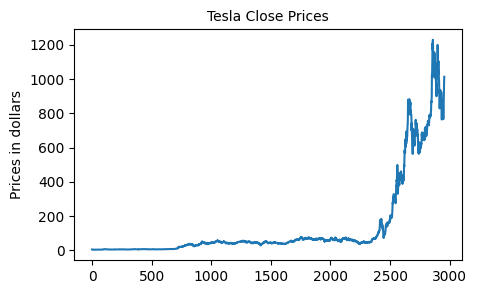

In [6]:
plt.figure(figsize = (5,3))
plt.plot(df['Close'])
plt.title('Tesla Close Prices', fontsize = 10)
plt.ylabel('Prices in dollars')
plt.show()

The prices of Tesla stock are showing an upward trend based on this plot.

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,3.800,5.000,3.508,4.778,4.778,93831500
1,6/30/2010,5.158,6.084,4.660,4.766,4.766,85935500
2,7/1/2010,5.000,5.184,4.054,4.392,4.392,41094000
3,7/2/2010,4.600,4.620,3.742,3.840,3.840,25699000
4,7/6/2010,4.000,4.000,3.166,3.222,3.222,34334500


Here, the data in the 'Close' column and 'Adj Close' column appears to be the same. We will next check whether this is true or not.

In [8]:
df[df['Close'] == df['Adj Close']].shape

(2956, 7)

This means that the data in both columns is the same. This reduncy can be removed by dropping the 'Adj Close' column for further analysis.

In [9]:
df = df.drop(['Adj Close'], axis = 1)

We now check for null values.

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

It can be observed that there are no null values in this dataset. We will now build the distribution plot for the continuous features given in the dataset.

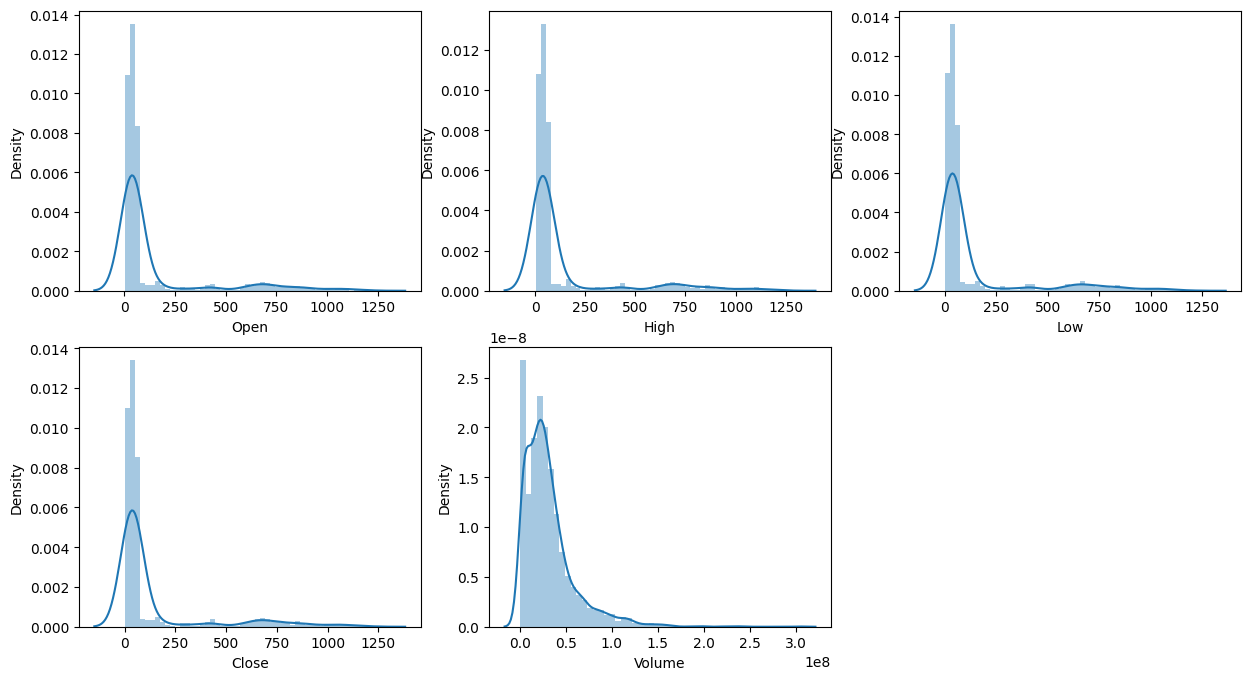

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize = (15,8))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution for OHLC, we can observe two peaks. This simply means that the data varied in two regions. The Volume distribution is left skewed.

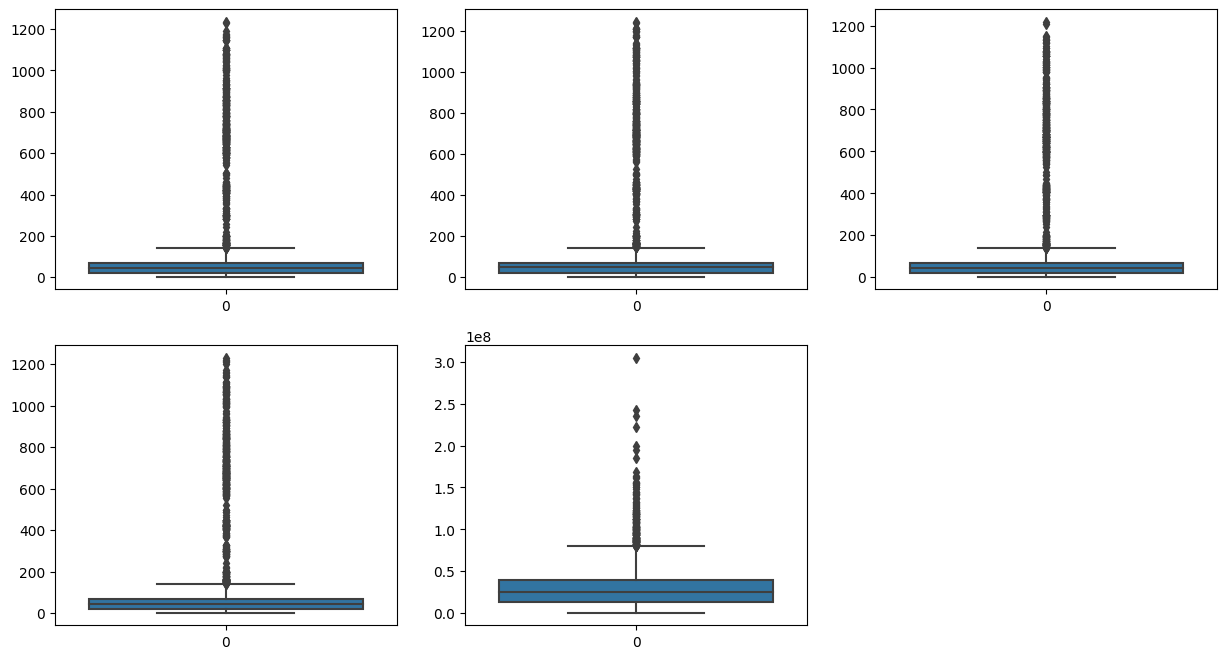

In [12]:
plt.subplots(figsize = (15,8))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

This shows that the data from all OHLCV contain outliers.

**Feature Engineering**

In [13]:
splitted = df['Date'].str.split('/', expand = True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,6/30/2010,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,7/1/2010,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,7/2/2010,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,7/6/2010,4.000,4.000,3.166,3.222,34334500,6,7,2010


In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0, 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,6/30/2010,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,7/1/2010,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,7/2/2010,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,7/6/2010,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


A quarter is defined as a group of 3 months. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

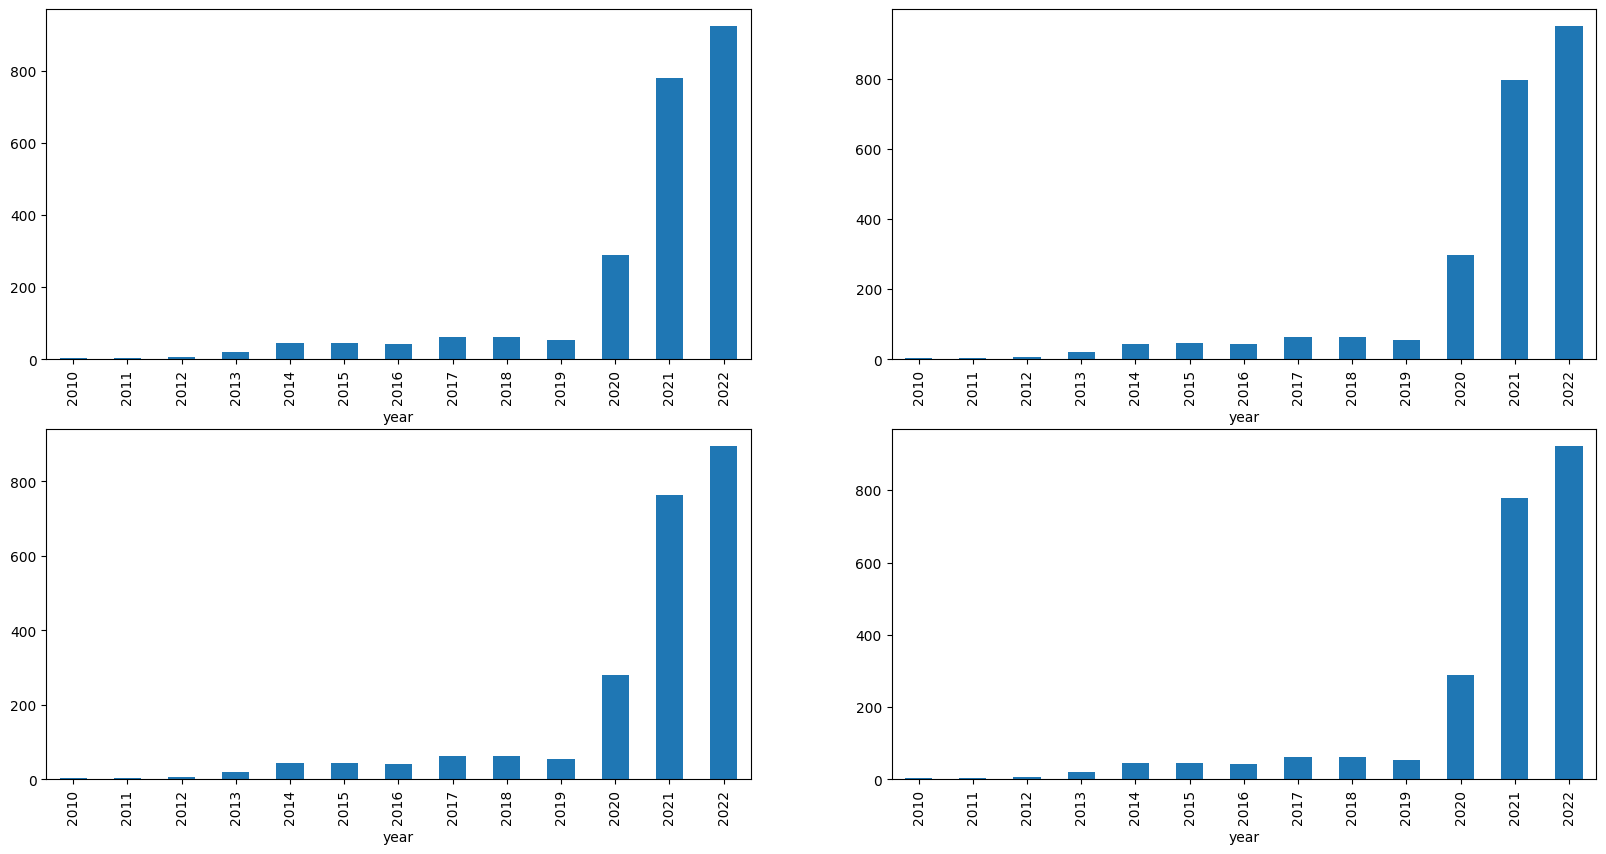

In [15]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize = (20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

It can be seen that the stock prices have been doubled from the year 2013 to 2014.

In [16]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


Here, prices are higher in the months which are quarter end as compared to that of the non-quarter end months. The volume of trades is lower in the months which are quarter end.



In [17]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Here, we have added more columns. The target feature is what we will train our model to predict. It will predict whether to buy or  not buy Tesla stocks. Before proceeding, we'll check if the target is balanced or not using a pie chart.

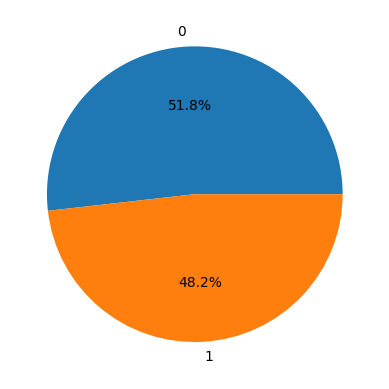

In [18]:
plt.pie(df['target'].value_counts().values,
        labels = [0,1], autopct = '%1.1f%%')
plt.show()

We must make sure the dataset is not highly correlated.

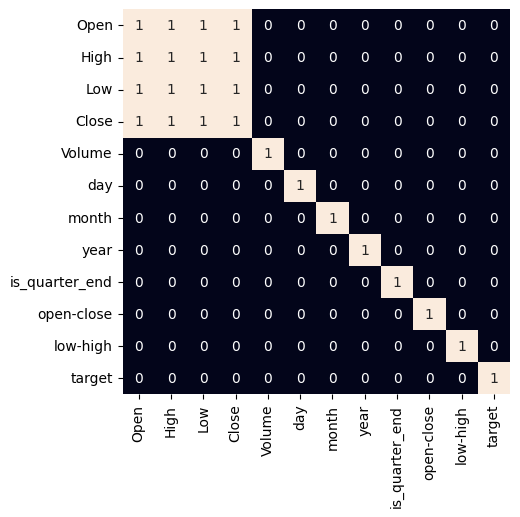

In [19]:
plt.figure(figsize = (5,5))

sb.heatmap(df.corr() > 0.9, annot = True, cbar = False)
plt.show()

This means that there is high correlation between OHLC and other features are not highly correlated.

**Data Splitting and Normalization**

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 3) (296, 3)


**Model Development and Evaluation**

In [21]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5144548991864166
Validation Accuracy :  0.5384615384615384

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5003673151750974
Validation Accuracy :  0.4596611721611722

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

Out of the 3 models we have built, XGBClassifier has the best fit but it is pruned to overfitting as the difference between trained and validated accuracy is too hight. That is not the case with Logistic.

In [28]:
from sklearn.metrics import confusion_matrix

# Initialize an empty confusion matrix
combined_cm = np.zeros((2, 2), dtype=int)

# Loop through the models
for i in range(3):
    # Make predictions on the validation set
    y_pred = models[i].predict(X_valid)

    # Compute the confusion matrix
    cm = confusion_matrix(Y_valid, y_pred)

    # Add the current confusion matrix to the combined confusion matrix
    combined_cm += cm

# Print the combined confusion matrix
print("Combined Confusion Matrix:")
print(combined_cm)

Combined Confusion Matrix:
[[ 65 355]
 [ 74 394]]


The accuracy can be calculated from the confusion matrix. The accuracy is seen to be 51%.